In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [18]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [19]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [20]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight   age  
0             0.1010        0.1500  16.5  
1             0.0485        0.0700   8.5  
2             0.1415        0.2100  10.5  
3             0.1140        0.1550  11.5  
4             0.0395        0.0550   8.5  
...              ...           ...   ...  
4172          0.2390        0.2490  12.5  
4173          0.2145        0.2605  11.5  
4174          0.2875        0.3080  10.5  
4175          0.2610        0.2960  11.5  
4176          0.3765        0.4950  13.5  

[4177 rows x 9 columns]

In [21]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 4177 observations with 9 features.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


# Describeing Dataset

In [23]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight          age  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831    11.433684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     2.500000  
25%          0.093500      0.130000     9.500000  
50%          0.171000      0.234000    10.500000  
75%          0.253000      0.329000    12.500000  
max          0.760000      1.005000    30.500000

- No missing values in the dataset
- All numerical features except 'sex'
- Though features are not normaly distributed, are close to normality

# Checking null values:-

In [24]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

Here we found there is no null value in our dataframe

# Data visualization:

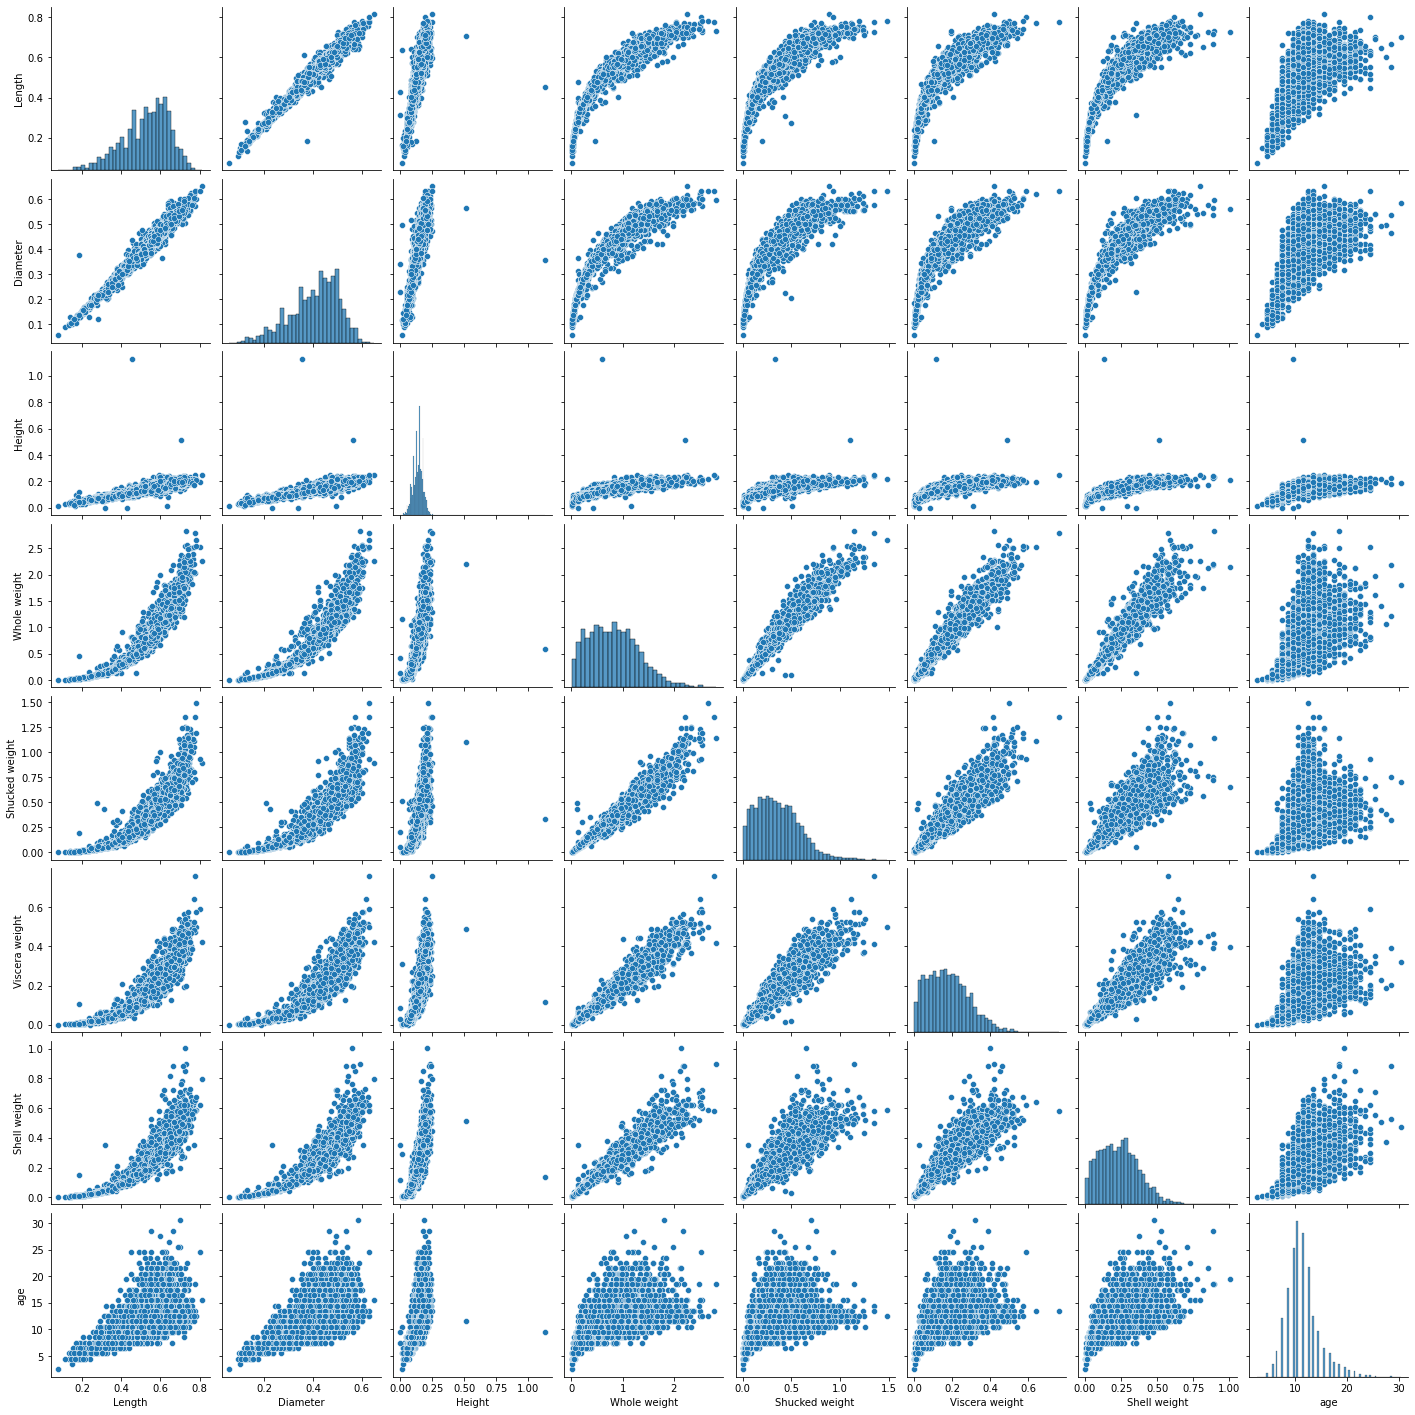

In [25]:
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

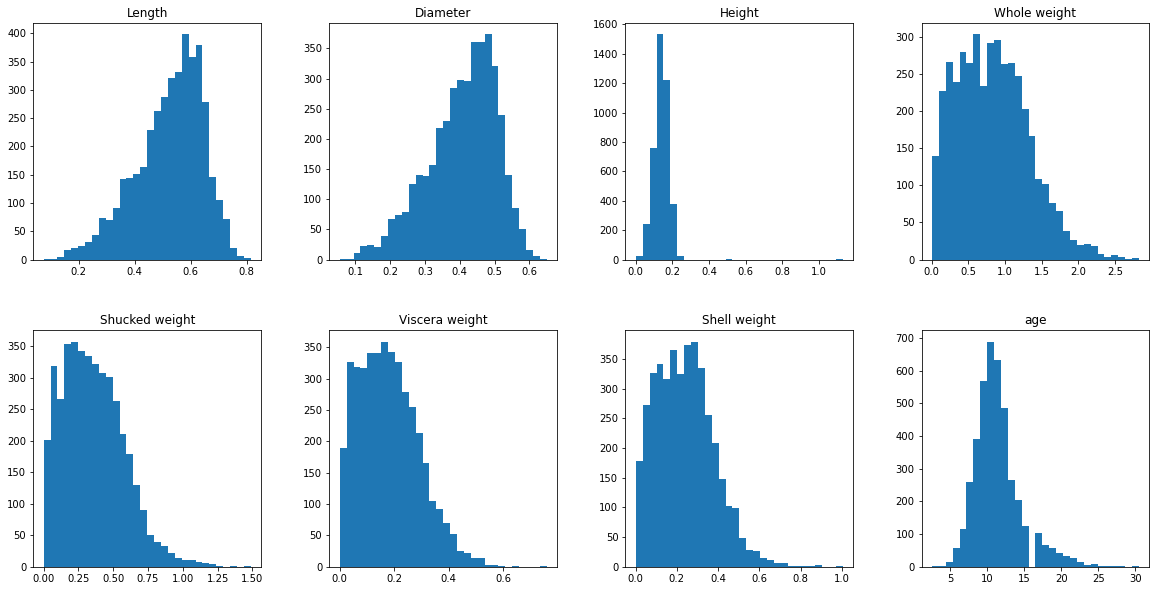

In [33]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [34]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [36]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [37]:
categorical_features

Index(['Sex'], dtype='object')

In [38]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

# SEX attribute- categorical variable

<AxesSubplot:xlabel='Sex', ylabel='count'>

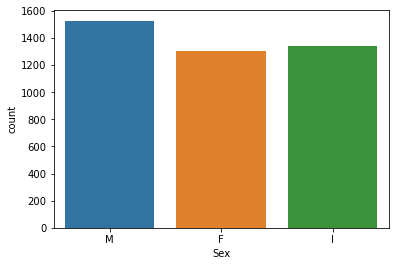

In [41]:
sns.countplot(x = 'Sex', data = df)

The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

<AxesSubplot:xlabel='Sex', ylabel='age'>

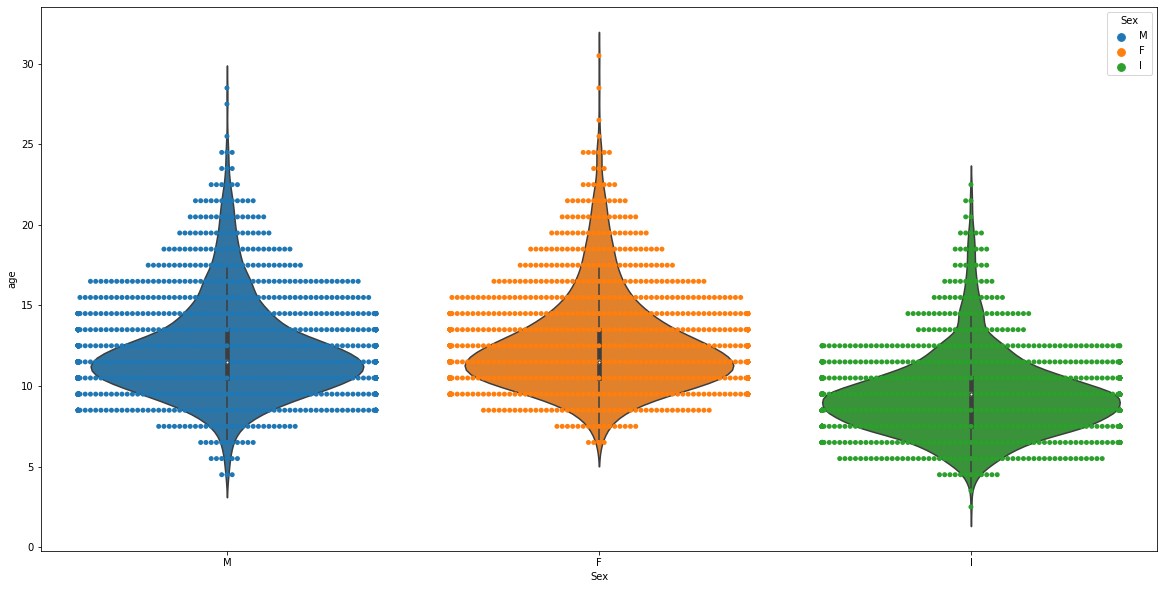

In [48]:
plt.figure(figsize = (20,10))
sns.swarmplot(x='Sex',y='age',data =df, hue = 'Sex')
sns.violinplot(x='Sex',y='age',data =df)

In [49]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [50]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'age']].mean()

Length  Diameter    Height  Whole weight  Shucked weight  \
Sex                                                               
F    0.579093  0.454732  0.158011      1.046532        0.446188   
I    0.427746  0.326494  0.107996      0.431363        0.191035   
M    0.561391  0.439287  0.151381      0.991459        0.432946   

     Viscera weight  Shell weight        age  
Sex                                           
F          0.230689      0.302010  12.629304  
I          0.092010      0.128182   9.390462  
M          0.215545      0.281969  12.205497

# Correlations

In [54]:
df.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
age             0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight       age  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
age                   0.503819      0.627574  1.000000

<AxesSubplot:>

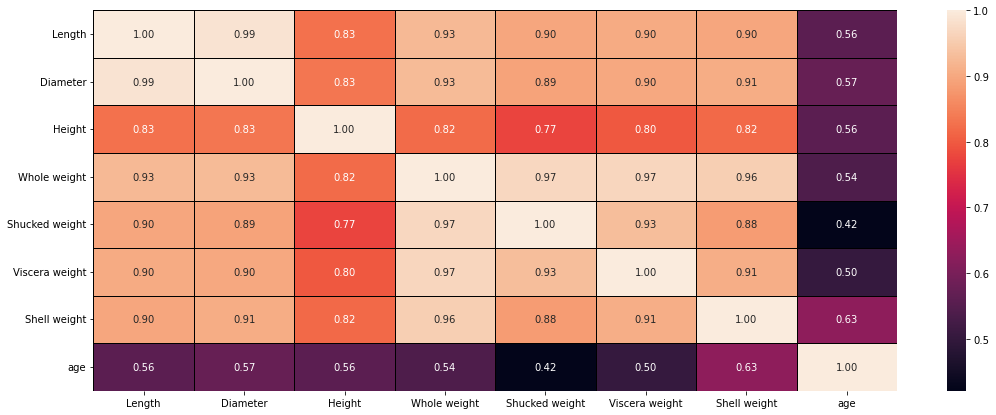

In [60]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [61]:
df = pd.get_dummies(df)
dummy_df=df.copy()

In [62]:
dummy_df

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight   age  Sex_F  Sex_I  Sex_M  
0           0.1500  16.5      0      0      1  
1           0.0700   8.5      0      0      1  
2           0.2100  10.5      1      0      0  
3           0.1550  11.5      0      0      1  
4           0.0550   8.5      0      1      0  
...            ...   ...    ...    ...    ...  
4172        0.2490  12.5      1      0      0  
4173        0.2605  11.5      0      0      1  
4174        0.3080  10.5      0      0      1  
4175        0.2960  11.5      1      0      0  
4176        0.4950  13.5      0      0      1  

[4177 rows x 11 columns]

In [75]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

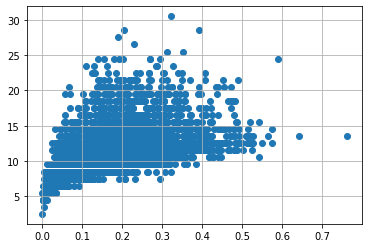

In [69]:
plt.scatter(x = df['Viscera weight'], y=df['age'],)
plt.grid(True)

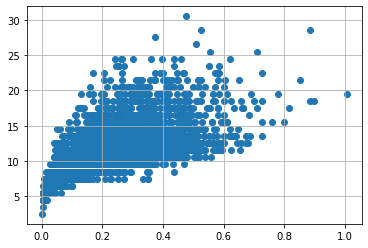

In [71]:
plt.scatter(x = df['Shell weight'], y=df['age'],)
plt.grid(True)

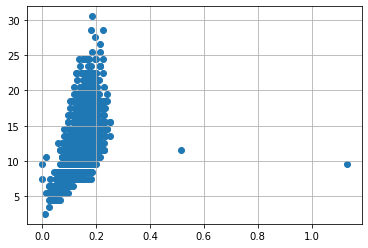

In [76]:
plt.scatter(x = df['Height'], y=df['age'],)
plt.grid(True)

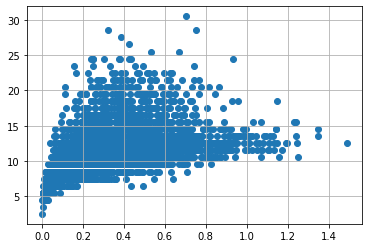

In [77]:
plt.scatter(x = df['Shucked weight'], y=df['age'],)
plt.grid(True)

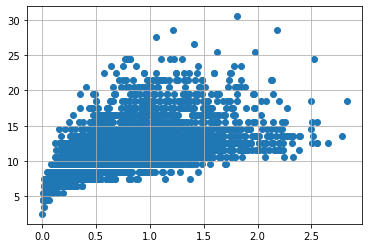

In [78]:
plt.scatter(x = df['Whole weight'], y=df['age'],)
plt.grid(True)

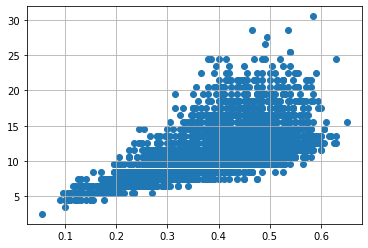

In [79]:
plt.scatter(x = df['Diameter'], y=df['age'],)
plt.grid(True)

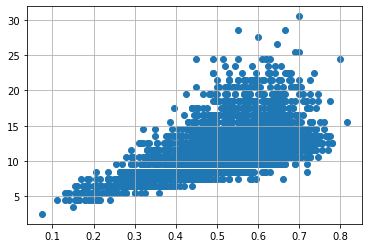

In [80]:
plt.scatter(x = df['Length'], y=df['age'],)
plt.grid(True)

# Outliers Checking:-


<AxesSubplot:>

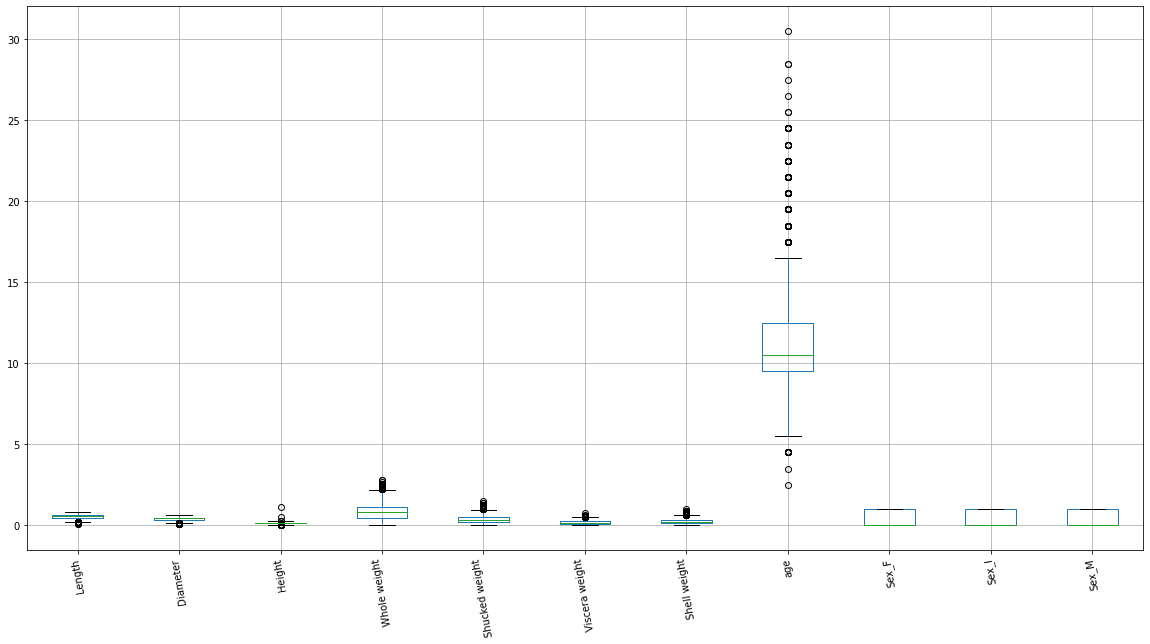

In [74]:
df.boxplot( rot = 100, figsize=(20,10))

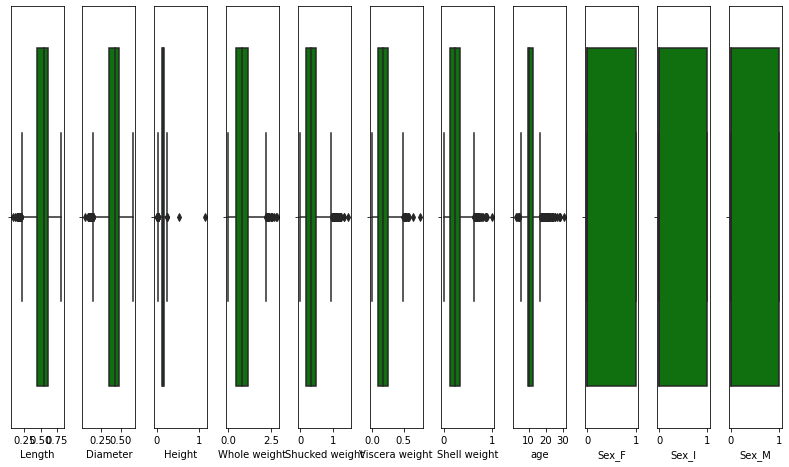

In [65]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Outliers:-

In [81]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 11)

In [82]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [83]:
len(np.where(z>3)[0])

200

In [84]:
z.iloc[5]

Length            0.824395
Diameter          1.087206
Height            1.064424
Whole weight      0.973307
Shucked weight    0.983919
Viscera weight    0.940625
Shell weight      0.853756
age               0.599818
Sex_F             0.674834
Sex_I             1.453451
Sex_M             0.759488
Name: 5, dtype: float64

In [85]:
df_new=df[(z<3).all(axis=1)]
print('Old dataframe',df.shape)
print('New dataframe',df_new.shape)
print('Total_dropped_rows',df.shape[0]-df_new.shape[0])

Old dataframe (4177, 11)
New dataframe (4027, 11)
Total_dropped_rows 150


# % of data loss

In [87]:
loss_percent=(4177-4027)/4177*100
print(loss_percent,'%')

3.5910940866650707 %



# skewness:-

In [88]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

In [105]:
x=df.drop('age',axis=1)
y=df['age']

In [107]:
x.shape,y.shape

((4177, 10), (4177,))

In [ ]:
split data

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3341, 10), (836, 10), (3341,), (836,))

In [109]:
lr=LinearRegression()

In [110]:
lr.fit(x_train,y_train)

LinearRegression()

# Test

In [111]:
pred=lr.predict(x_test)

In [112]:
pred

array([12.8125, 14.5625, 12.4375, 13.8125,  8.875 , 11.1875, 15.75  ,
       13.5   , 11.0625,  6.875 ,  9.375 ,  9.9375,  8.875 ,  7.375 ,
       11.375 , 12.5   , 11.4375,  7.5   , 11.875 , 14.6875, 12.0625,
       11.125 , 11.8125, 14.    , 16.3125,  8.3125,  9.0625, 12.9375,
       12.125 , 10.6875, 10.625 ,  9.625 , 13.0625, 13.6875,  7.9375,
       13.125 , 12.9375,  7.375 , 10.3125, 12.75  , 12.375 ,  9.5625,
       13.5   , 11.5   , 11.9375, 10.6875, 10.75  , 11.625 , 16.    ,
       10.0625, 10.0625, 15.5625,  8.4375, 12.5   , 11.3125, 10.5625,
       12.0625, 11.75  ,  9.125 ,  9.75  , 12.1875, 12.5   ,  9.5   ,
       11.5625, 11.625 , 10.625 , 14.3125,  9.3125, 11.6875, 15.    ,
       10.125 ,  8.3125, 11.5625, 11.9375, 12.875 , 10.625 , 12.375 ,
       12.5625,  8.5625, 10.6875, 11.875 , 13.9375, 11.5625, 16.5   ,
        8.5   , 10.4375, 12.4375,  9.8125, 15.0625, 11.375 , 11.9375,
       13.9375, 12.1875,  9.375 ,  8.375 , 10.5625, 11.6875, 10.0625,
       13.0625, 11. 

In [113]:
y_test

551     14.5
3245    14.5
1418    12.5
416     21.5
1553     8.5
        ... 
0       16.5
511     11.5
28      16.5
3400    11.5
918      8.5
Name: age, Length: 836, dtype: float64

In [114]:
diff=y_test-pred

In [115]:
diff

551     1.6875
3245   -0.0625
1418    0.0625
416     7.6875
1553   -0.3750
         ...  
0       5.7500
511     0.7500
28      3.4375
3400   -2.1875
918    -0.3750
Name: age, Length: 836, dtype: float64

In [116]:
pd.DataFrame(np.c_[y_test,pred,diff],columns=['Actual','Predicted','Difference'])

Actual  Predicted  Difference
0      14.5    12.8125      1.6875
1      14.5    14.5625     -0.0625
2      12.5    12.4375      0.0625
3      21.5    13.8125      7.6875
4       8.5     8.8750     -0.3750
..      ...        ...         ...
831    16.5    10.7500      5.7500
832    11.5    10.7500      0.7500
833    16.5    13.0625      3.4375
834    11.5    13.6875     -2.1875
835     8.5     8.8750     -0.3750

[836 rows x 3 columns]